<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>

# Proyecto: Método de Euler
Autor: Nicolás Esteban Poyón Castro

## Objetivos

*   Calcular la trayectoria de un proyectil con y sin resistencia del aire
*   Determinar el alcance horizontal del proyectil
*   Determinar númericamente con que ángulo se obtiene el alcance máximo

## Definición de la función *proyectil* que resuelve las ecuaciones diferenciales del movimiento del proyectil

In [ ]:
# Importando librerías
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
B2_m = 0.00004
g = 9.8
v0 = 700
theta0 = np.pi/6
N = 100000
dt = 0.01

In [ ]:
# Función del movimiento del proyectil considerando la resistencia del aire
def proyectil(B2_m, v0, theta0, N, dt):
  # Condiciones iniciales
  t = 0
  vx = v0*np.cos(theta0)
  vy = v0*np.sin(theta0)
  x = 0
  y = 0
  # Listas para guardar los valores de las variables
  Vx = []
  Vy = []
  T = []
  X = []
  Y = []
  # Ciclo para ir calculando los valores de las variables y añadiendolos a las listas
  for i in range(N):
    # Añadiendo valores a las listas
    T.append(t)
    X.append(x)
    Y.append(y)
    Vx.append(vx)
    Vy.append(vy)
    # Calculando los nuevos valores de las variables
    vn = np.sqrt(vx**2 + vy**2)
    t = t + dt
    vx = vx - B2_m*vn*vx*dt
    vy = vy - g*dt - B2_m*vn*vy*dt
    x = x + vx*dt
    y = y + vy*dt

    # Si y < 0 la función se detiene
    if y < 0:
      break

  # La función devuelve los valores de x y y
  return X, Y

# Cálculo de la trayectoria del proyectil con y sin resistencia del aire

Realizamos la gráfica de la trayectoria del proyectil con y sin resistencia del aire.

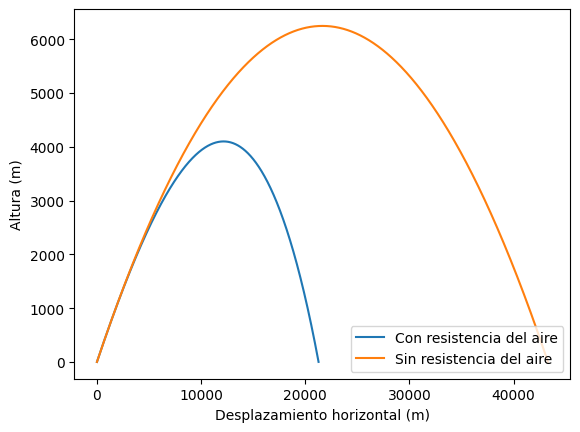

In [ ]:
# Obtenemos los datos para un proyectil sobre el que actúa la resistencia del aire
x, y = proyectil(B2_m, v0, theta0, N, dt)
# Graficamos la trayectoria del proyectil
plt.plot(x, y, label = "Con resistencia del aire")

# Obtenemos los datos para un proyectil sobre el cual no actúa la resistencia del aire
x, y = proyectil(0, v0, theta0, N, dt)
# Graficamos la trayectoria del proyectil
plt.plot(x, y, label = "Sin resistencia del aire")

# Le agregamos título y etiquetas a la gráfica
plt.ylabel('Altura (m)')
plt.xlabel('Desplazamiento horizontal (m)')
plt.legend()
plt.show()

# Determinación del alcance del proyectil

Ahora solo nos interesa conocer el alcance horizontal del proyectil, entonces modificamos nuestra función para que el único valor que devuelva sea la posición horizontal del proyectil.

In [ ]:
# Función del movimiento del proyectil cuando y >= 0
def proyectil0(B2_m, v0, theta0, N, dt):
  # Condiciones iniciales
  t = 0
  vx = v0*np.cos(theta0)
  vy = v0*np.sin(theta0)
  x = 0
  y = 0
  # Listas para guardar los valores de las variables
  Vx = []
  Vy = []
  T = []
  X = []
  Y = []
  # Ciclo para ir calculando los valores de las variables y añadiendolos a las listas
  for i in range(N):
    T.append(t)
    X.append(x)
    Y.append(y)
    Vx.append(vx)
    Vy.append(vy)
    vn = np.sqrt(vx**2 + vy**2)
    # Calculando los nuevos valores de las variables
    t = t + dt
    vx = vx - B2_m*vn*vx*dt
    vy = vy - g*dt - B2_m*vn*vy*dt
    x = x + vx*dt
    y = y + vy*dt
    # Si y < 0 la función se detiene
    if y < 0:
      break

  # La función devuelve los valores de x
  return X

Obtenemos el valor del alcance horizontal tomando el último valor que devuelve la función del proyectil modificada.

In [ ]:
# Obtenemos los datos para un proyectil sobre el que actúa la resistencia del aire
x= proyectil0(B2_m, v0, theta0, N, dt)
# Imprimimos el valor del desplazamiento horizontal para esta trayectoria
print(f'Desplazamiento horizontal con resistencia del aire: {round(x[len(x)-1], 0)}m')

# Obtenemos los datos para un proyectil sobre el cual no actúa la resistencia del aire
x= proyectil0(0, v0, theta0, N, dt)
# Imprimimos el valor del desplazamiento horizontal para esta trayectoria
print(f'Desplazamiento horizontal sin resistencia del aire: {round(x[len(x)-1], 0)}m')

Desplazamiento horizontal con resistencia del aire: 21276.0m
Desplazamiento horizontal sin resistencia del aire: 43290.0m


# Verificación del ángulo con el cual se alcanza el desplazamiento horizontal máximo para el caso en el que no se tiene resistencia del aire

Para verificar que el ángulo con el que se obtiene el alcance horizontal máximo es de 45°, calculamos el alcance con distintos ángulos de lanzamiento y con esto hacemos una gráfica del alcance horizontal versus el ángulo de lanzamiento.

Ángulo de lanzamiento: 40.0°, Alcance horizontal: 49231.0m
Ángulo de lanzamiento: 41.0°, Alcance horizontal: 49507.0m
Ángulo de lanzamiento: 42.0°, Alcance horizontal: 49721.0m
Ángulo de lanzamiento: 43.0°, Alcance horizontal: 49869.0m
Ángulo de lanzamiento: 44.0°, Alcance horizontal: 49961.0m
Ángulo de lanzamiento: 45.0°, Alcance horizontal: 49992.0m
Ángulo de lanzamiento: 46.0°, Alcance horizontal: 49963.0m
Ángulo de lanzamiento: 47.0°, Alcance horizontal: 49869.0m
Ángulo de lanzamiento: 48.0°, Alcance horizontal: 49720.0m
Ángulo de lanzamiento: 49.0°, Alcance horizontal: 49506.0m
Ángulo de alcance horizontal máximo: 45.0°


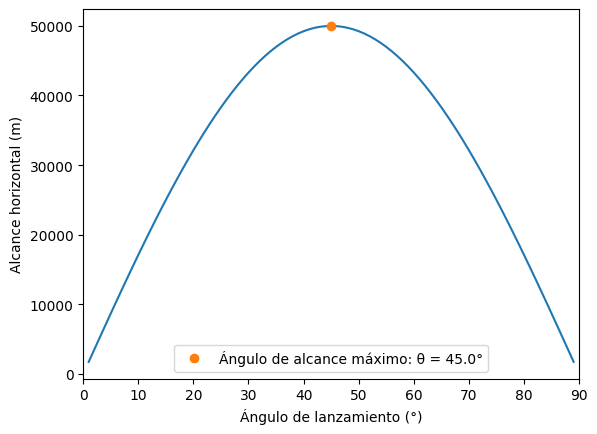

In [ ]:
# Valores con los que iniciamos
theta0 = np.pi/180
x_max = 0
theta_max = 0
alcance = []
angulo = []

# Se obtiene el alcance horizontal para ángulos de lanzamiento entre 1° y 89°
while theta0 < np.pi/2:
  # Obtenemos la posición horizontal para un proyectil sobre el cual no actúa la resistencia del aire
  x = proyectil0(0, v0, theta0, N, dt)

  # Añadimos a listas el alcance horizontal y su ángulo de lanzamiento
  alcance.append(x[len(x)-1])
  angulo.append(round(theta0*180/np.pi, 0))


  #Obtenemos el alcance horizontal máximo y el ángulo con el que se lanzó
  if x[len(x)-1] > x_max:
    x_max = x[len(x)-1]
    theta_max = round(theta0*180/np.pi, 0)

  # Imprimimos el alncance horizontal para algunos ángulos de lanzamiento
  if theta0 > 4*np.pi/18 and theta0 < 5*np.pi/18:
    print(f'Ángulo de lanzamiento: {round(theta0*180/np.pi, 0)}°, Alcance horizontal: {round(x[len(x)-1], 0)}m')

  # Incrementamos el valor del ángulo
  theta0 += np.pi/180


#Imprimimos el valor del ángulo con el que se obtiene el alcance máximo
print(f'Ángulo de alcance horizontal máximo: {theta_max}°')

# Hacemos la gráfica del ángulo de lanzamiento vs alcance horizontal
plt.plot(angulo, alcance)
plt.plot(theta_max, x_max,'o', label = f'Ángulo de alcance máximo: θ = {theta_max}°')
plt.legend()
plt.ylabel('Alcance horizontal (m)')
plt.xlabel('Ángulo de lanzamiento (°)')
plt.xlim(0,90)
plt.show()

# Determinación del ángulo con el cual se alcanza el desplazamiento horizontal máximo para el caso en el que se tiene resistencia del aire

Calculamos el ángulo con el cual obtenemos el máximo desplazamiento horizontal y nuevamente hacemos una gráfica del alcance horizontal versus el ángulo de lanzamiento.

Ángulo de lanzamiento: 30.0°, Alcance horizontal: 21276.0m
Ángulo de lanzamiento: 31.0°, Alcance horizontal: 21447.0m
Ángulo de lanzamiento: 32.0°, Alcance horizontal: 21596.0m
Ángulo de lanzamiento: 33.0°, Alcance horizontal: 21725.0m
Ángulo de lanzamiento: 34.0°, Alcance horizontal: 21832.0m
Ángulo de lanzamiento: 35.0°, Alcance horizontal: 21919.0m
Ángulo de lanzamiento: 36.0°, Alcance horizontal: 21985.0m
Ángulo de lanzamiento: 37.0°, Alcance horizontal: 22029.0m
Ángulo de lanzamiento: 38.0°, Alcance horizontal: 22055.0m
Ángulo de lanzamiento: 39.0°, Alcance horizontal: 22060.0m
Ángulo de lanzamiento: 40.0°, Alcance horizontal: 22046.0m
Ángulo de lanzamiento: 41.0°, Alcance horizontal: 22014.0m
Ángulo de lanzamiento: 42.0°, Alcance horizontal: 21961.0m
Ángulo de lanzamiento: 43.0°, Alcance horizontal: 21890.0m
Ángulo de lanzamiento: 44.0°, Alcance horizontal: 21800.0m
Ángulo de alcance horizontal máximo: 39.0°


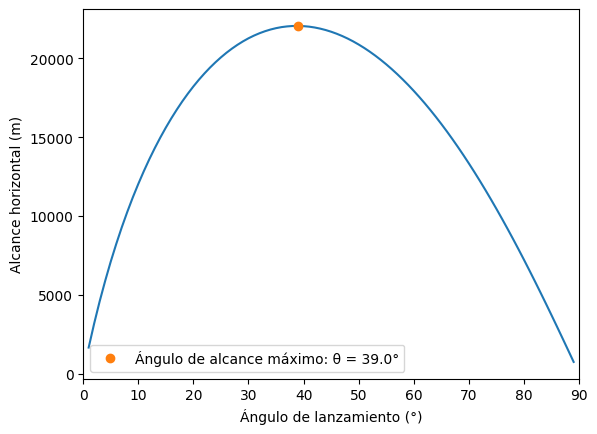

In [ ]:
# Valores con los que iniciamos
theta0 = np.pi/180
alcance = []
angulo = []
x_max = 0
theta_max = 0

# Se obtiene el alcance horizontal para ángulos de lanzamiento entre 1° y 89°
while theta0 < np.pi/2:
  # Obtenemos la posición horizontal de un proyectil sobre el cual actúa la resistencia del aire
  x = proyectil0(B2_m, v0, theta0, N, dt)

  # Añadimos a listas el alcance horizontal y su ángulo de lanzamiento
  alcance.append(x[len(x)-1])
  angulo.append(round(theta0*180/np.pi, 0))

  #Obtenemos el alcance horizontal máximo y el ángulo con el que se lanzó
  if x[len(x)-1] > x_max:
    x_max = x[len(x)-1]
    theta_max = round(theta0*180/np.pi, 0)

  # Imprimimos el alncance horizontal para algunos ángulos de lanzamiento
  if theta0 > np.pi/6 and theta0 < np.pi/4:
    print(f'Ángulo de lanzamiento: {round(theta0*180/np.pi, 0)}°, Alcance horizontal: {round(x[len(x)-1], 0)}m')

  # Incrementamos el valor del ángulo
  theta0 += np.pi/180

#Imprimimos el valor del ángulo con el que se obtiene el alcance máximo
print(f'Ángulo de alcance horizontal máximo: {theta_max}°')

# Hacemos la gráfica del ángulo de lanzamiento vs alcance horizontal
plt.plot(angulo, alcance)
plt.plot(theta_max, x_max,'o', label = f'Ángulo de alcance máximo: θ = {theta_max}°')
plt.legend()
plt.ylabel('Alcance horizontal (m)')
plt.xlabel('Ángulo de lanzamiento (°)')
plt.xlim(0,90)
plt.show()